# Autamted Trading

## Capitak Management

A central question in algorithmic trading is how much capital to deploy to a given algorithmic trading strategy given the total available capital. The answer to this question depends on the main goal.

### The Kelly Criterion in a Binomial Setting

The common way of introducing the theory of the Kelly criterion for investing is on the basis of a coin tossing game, or generally a binomial setting. Assume a gambler is playing a coin tossing game against an infinitely rich bank or casino. Assume further that the probability for heads is some value $p$ for which $\frac{1}{2}<p<1$ holds. Probability for tails is defined by $q=1-p<\frac{1}{2}$. The gambler can place bets $b>0$ of arbitrary size, whereby the gambler wins the same amount if right and loses it all if wrong. The gambler would of course want to bet on heads. Therefore, the expected value for this betting game $B$ in one shot setting is:
$$\mathbf{E}[B]=p\cdot b - q\cdot b=(p-q)\cdot b >0$$

Trading in financial markets is not a one shot game in general. It is a repeated one. Assume that $b_i$ represents the amount that is bet on day $i$ and that $c_0$ represents the initial capital. The capital $c_1$ at the end of day one depends on the betting success on that day and might be either $c_0+b_1$ or $c_0-b_1$. The expected value ofr a gamble that is repeated $n$ times then is:
$$\mathbf{E}[B^n]=c_0+\sum_{i=1}^n(p-q)\cdot b_i$$

In classical economic theory, with risk-neutral, expected utiltiy-maximizing agents, a gambler would try to maximize this expression. It is maximized by betting all available funds - i.e., $b_i=c_{i-1}$ like in the one-shot scenario. This in turn implies that a single loss will wipe out all available funds and will lead to ruin. Therefore, this strategy does not lead to a maximization of long-term wealth.

While betting the maximum capital available might lead to sudden ruin, betting nothint at all avoids any kind of loss but does not benefit from the advatageous gamble either. This is where the Kelly criterion comes into play, since it derives the optimal fraction $f$ of the available capital to be per round of betting. Assume that $n=h+t$, where $h$ stands for the number of heads observed during $n$ rounds of betting and where $t$ stands for the number of tails. With these definitions, the available capital after $n$ round is:
$$c_n=C_0\cdot (1+f)^h\cdot (1-f)^t$$

Long-term wealth maximization boils down to maximizing the average goemtric growth rate per bet.
$$r^g=\log\left(\frac{c_n}{c_0}\right)^{1/n}\\
=\log\left(\frac{c_0\cdot (1+f)^h\cdot(10f)^t}{c_0}\right)^{1/n}\\
=\log\left((1+f)^h\cdot (1-f)^t\right)^{1/n}\\
=\frac{h}{n}\log(1+f)+\frac{t}{n}\log(1-f)$$

The problem foramlly is to maximize the expected average rate of growth by choosing $f$ optimally. With $\mathbf{E}[h]=n\cdot p$ and $\mathbf{E}[t]=n\cdot q$, one gets:
$$\mathbf{E}[r^g]=\mathbf{E}[\frac{h}{n}\log(1+f)+\frac{t}{n}\log(1-f)]\\
=\mathbf{E}[p \log(1+f)+q \log(1-f)]\\
=p\log (1+f) + q \log(1-f)\\
\equiv G(f)$$

One can now maximize the term by choosing the optimal fraction $f$ according to the first-order condition. The first derivative is given by:
$$G'(f)=\frac{p}{1+f}-\frac{1}{1-f}\\
=\frac{p-pf-q-qf}{(1+f)(1-f)}\\
=\frac{p-q-f}{(1+f)(1-f)}$$

From the first-order condition, one gets:
$$G'(f)=0 \Rightarrow f^*=p-q$$

It is optimal to invest a fraction $f^*=p-q$ per round of betting. With, $p=0.55$ one has $f^*=0.55-0.45=0.1$, indicating that the optimal fraction is $10\%$.

In [58]:
import math
import time
import numpy as np
import datetime as dt
import cufflinks as cf
from pylab import plt
import seaborn as sns

np.random.seed(1000)
sns.set()
%matplotlib inline

In [59]:
# 50 series with 100 coin tosses per series

p = 0.55            # fixes the probability for heads
f = p - (1 - p)     # calculates the optimal fraction according to the Kelly criterion
f


0.10000000000000009

In [60]:
I = 50          # the number of series to be simulated
n = 100         # the number of trials per series

In [61]:
# run_simulation achieves the simulation according to the prior assumoptions.
def run_simulation(f):
    # instantiates an nddarray object to stroe the simulation results
    c = np.zeros((n, I))   
    # initializes the starting capital with 100     
    c[0] = 100

    # outer loop for the series simulation
    for i in range(I):

        # inner loop for the series itself
        for t in range(1, n): 
            # simulates the tossing of a coin
            o = np.random.binomial(1, p) 

            # if 1, i.e., heads
            if o > 0:
                # add the win to the capital
                c[t, i] = (1 + f) * c[t - 1, i]
            
            # If 0, i.e., tails
            else:
                # substract the loss from the capital
                c[t, i] = (1 - f) * c[t - 1, i]

    return c    


In [62]:
c_1 = run_simulation(f)

In [63]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

Text(0.5, 1.0, 'Simulated series with 100 trials each (red line = average)')

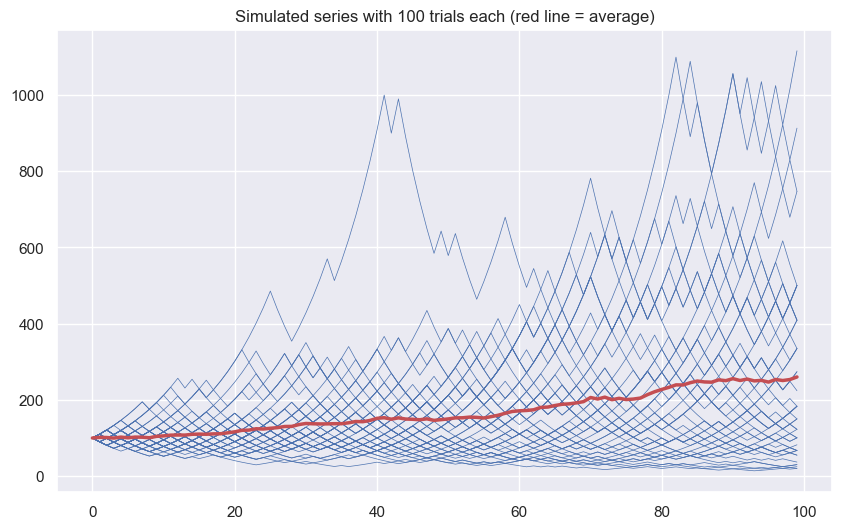

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5)
plt.title('Simulated series with 100 trials each (red line = average)')

The following code repeats the simulation for different values of $f$. A low fraction leads to a lower growth rate on average. Higher value might lead to a higher average capital at the end of the simulation ($f=0.25$) or to a much lower average capital ($f=0.5$). Where the fraction $f$ is higher, the volatility increases considerably.

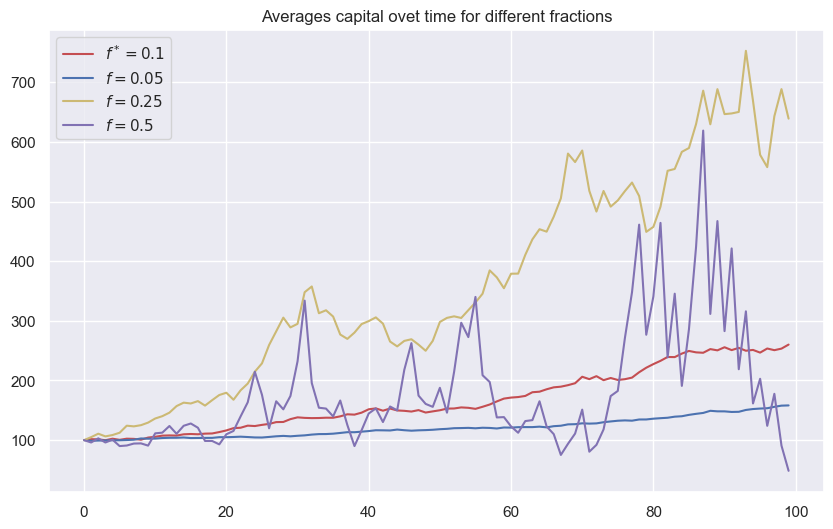

In [65]:
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.5)

plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.title('Averages capital ovet time for different fractions')
plt.legend(loc=0)

### The Kelly Criterion for Stocks and Indices

Assume a stock market setting in which the relevant stock (index) can take on only two values after a period of one year from today, given its known value today. The setting is again binomial, but this time a bit closer on the modeling side to stock market realities. Specificaaly, assume that $P(r^S=\mu+\sigma)=P(r^S=\mu-\sigma)=\frac{1}{2}$ with $\mathbf{E}[r^S]=\mu > 0$ being the expected return of the stock over one year and $\sigma >0 $ being the standard deviation of returns (volatiltity). In a one-period setting, one gets for the available capital after one year (with $c_0$ and $f$ defined as before):
$$c(f)=c_0\cdot(1+(1-f)\cdot r+f \cdot r^S)$$

Here, $r$ is the constant short rate earned on cash not invested in the stock. Maximizing geometric growth rate means maximizing the term:
$$G(f)=\mathbf{E}\left[\log\frac{c(f)}{c_0}\right]$$

Assume that there are $n$ relevant trading days in the year so that for each such trading day $i$:
$$P\left(r_i^S=\frac{\mu}{n}+\frac{\sigma}{\sqrt{n}}\right)=P\left(r_i^S=\frac{\mu}{n}-\frac{\sigma}{\sqrt{n}}\right)=\frac{1}{2}$$

Under these assumptions, the daily values scale up to the yearly ones from before and one gets:
$$c_n(f)=c_0\cdot \prod_{i=1}^n\left(1+(1-f)\cdot\frac{r}{n}+f\cdot r_i^S\right)$$

One has to maximize the following quantity to achieve maximum long-term wealth when investing in the stock:

$$G_n(f)=\mathbf{E}\left[\log\frac{c_n(f)}{c_0}\right]\\
=\mathbf{E}\left[\log(1+(1-f_)\cdot\frac{r}{n}+f\cdot r_i^S)\right]\\
=\frac{1}{2}\sum_{i=1}^n\log\left(1+(1-f)\cdot\frac{r}{n}+f\cdot\left(\frac{\mu}{n}+\frac{\sigma}{\sqrt{n}}\right)\right)+\log\left(1+(1-f)\frac{r}{n}+f\cdot\left(\frac{\mu}{n}-\frac{\sigma}{\sqrt{n}}\right)\right)\\
=\frac{n}{2}\log\left(\left(1+(1-f)\cdot\frac{r}{n}+f\cdot\frac{\mu}{n}\right)^2-\frac{f^2\sigma^2}{n}\right)$$

Using a Taylor series expansion, one finally arrives at:
$$G_n(f)=r+(\mu-r)\cdot f -\frac{\sigma^2}{2}\cdot f^2+\mathcal{O}\left(\frac{1}{\sqrt{n}}\right)$$

For infinitely many trading points in time - i.e., for continuous trading - at:
$$G_{\infty})(f)=r+(\mu-r)\cdot f -\frac{\sigma^2}{2}\cdot f^2$$

The optimal fraction $f^*$ is given through the first-order condition by the expression:
$$f^*=\frac{\mu-r}{\sigma^2}$$

This expression looks similar to the Sharpe ratio but is different.

In [66]:
# the trading strategy under consideration is simply a passive long position in the S&P 500 index.
import pandas as pd


raw = pd.read_csv('./source/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
symbol = '.SPX'

data = pd.DataFrame(raw[symbol])
data

,.SPX
Date,
2010-01-01,NaN
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
...,...
2018-06-25,2717.07
2018-06-26,2723.06
2018-06-27,2699.63


In [67]:
data['returns'] = np.log(data / data.shift(1))

In [68]:
data.dropna(inplace=True)
data.tail()

,.SPX,returns
Date,,
2018-06-25,2717.07,-0.013820
2018-06-26,2723.06,0.002202
2018-06-27,2699.63,-0.008642
2018-06-28,2716.31,0.006160
2018-06-29,2718.37,0.000758


The statistical properties of the S&P 500 index over the period covered suggest an optimal fracion of about 4.5 to be invested in the long position in the index. For every dollar available 4.5 dollars shall be incested - implying a leverage ratio of 4.5. The Kelly criterion implies a higher leverage the higher the expected return and the lower the volatility.

In [69]:
mu = data.returns.mean() * 252          # calculates the annualized return
sigma = data.returns.std() * 252 ** 0.5 # calculates the annualized volatility

r = 0.0         # set the risk-free rate to 0 (for simplicity)

In [70]:
f = (mu - r) / sigma ** 2       # calculates the optimal Kelly fraction to be invested in the strategy
f

4.4672043679706865

The following code simulates the application of the Kelly criterion and the optimal leverage ratio. For simplicity and comparison reasons, the initial equity is set to 1 while the initially invested total capital is set to $1\cdot f^*$. Depending on the performance of the capital deployed to the strategy, the total capital itself is adjusted daily according to the available equity.

In [71]:
equs = []

In [72]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)

    # generates a new column for equity and sets the initial value to 1
    data[equ] = 1 

    # genetates a new column for capital and sets the initial value to 1 * f^*              
    data[cap] = data[equ] * f   
    for i, t in enumerate(data.index[1:]):

        # picks the right DatetimeIndex value for the previous values
        t_1 = data.index[i]

        # calculates the new capital position given the return
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['returns'].loc[t])

        # adjusts the euiqty value according to the capital position performance
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]

        # ajusts the capital postion given the new equity position and the fixed leverage ratio
        data.loc[t, cap] = data[equ].loc[t] * f

In [73]:
kelly_strategy(f * 0.5)

In [74]:
kelly_strategy(f * 0.66)

In [75]:
kelly_strategy(f)

In [76]:
print(data[equs].tail())

            equity_2.23  equity_2.95  equity_4.47
Date                                             
2018-06-25     4.707070     6.367340     8.794342
2018-06-26     4.730248     6.408727     8.880952
2018-06-27     4.639340     6.246147     8.539593
2018-06-28     4.703365     6.359932     8.775296
2018-06-29     4.711332     6.374152     8.805026


Text(0.5, 1.0, 'Cumulative performance of S&P 500 compared to equity position given different values of f')

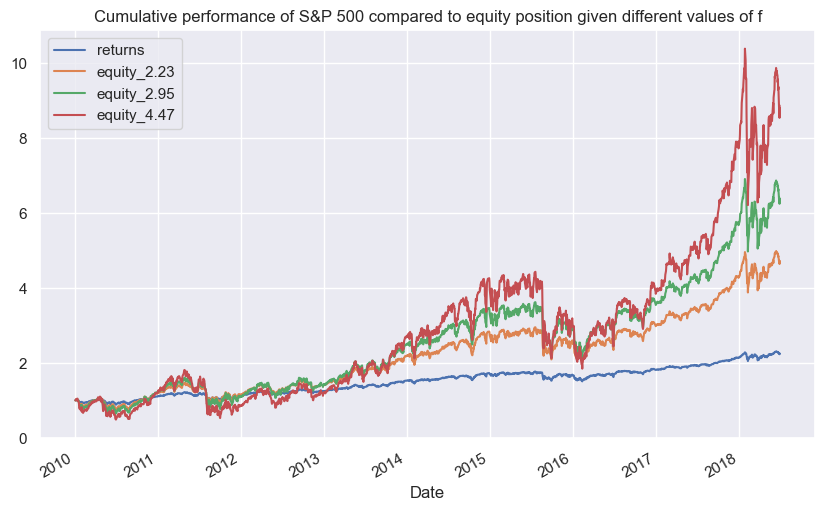

In [77]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10, 6))
data[equs].plot(ax=ax, legend=True)
plt.title('Cumulative performance of S&P 500 compared to equity position given different values of f')

Figure above illustrates, applying the optimal Kelly leverage leads to a rather erratic evolution equity position (high volatiltiy). One would expect the volatility of the equity position to increase with increasing leverage. Therefore, practitioners often reduce the leverage to, for example, 'half Kelly' - i.e., in the current example to $\frac{1}{2}\cdot f^*\approx 2.23$.

## ML-Based Trading Strategy

In [78]:
import fxcmpy

fxcmpy.__version__

'1.3.3'

In [80]:
# api = fxcmpy.fxcmpy(config_file='./fxcm.cfg')

In [81]:
# # m5 - every five minutes

# data = api.get_candles('EUR/USD', period='m5', 
#                        start='2018-06-01 00:00:00', stop='2018-06-30 00:00:00')
# data